In [1]:
import os
import glob as glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tqdm import tqdm



In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchvision.utils import make_grid


In [3]:
from model.DC_WGAN_GP import Generator, Critic
from processing.preprocessing import denorm, show_images

In [4]:
print(os.getcwd())
os.chdir('..')
os.getcwd()


/home/anhnguyen/Documents/GAN/src


'/home/anhnguyen/Documents/GAN'

In [5]:
DATA_DIR = glob.glob(f'animeFaces64')[0]
DATA_DIR

'animeFaces64'

In [6]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


# Load models

In [7]:
#Moving model to device
critic = Critic(im_chan = 3)
critic.to(device)

latent_size = 128

generator = Generator(z_dim = latent_size, im_chan = 3)
generator.to(device)

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [8]:
generator.load_state_dict(torch.load('WGAN_weights_64/G_64_E24.pth'))
generator.eval()

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Generate Images

torch.Size([64, 3, 64, 64])


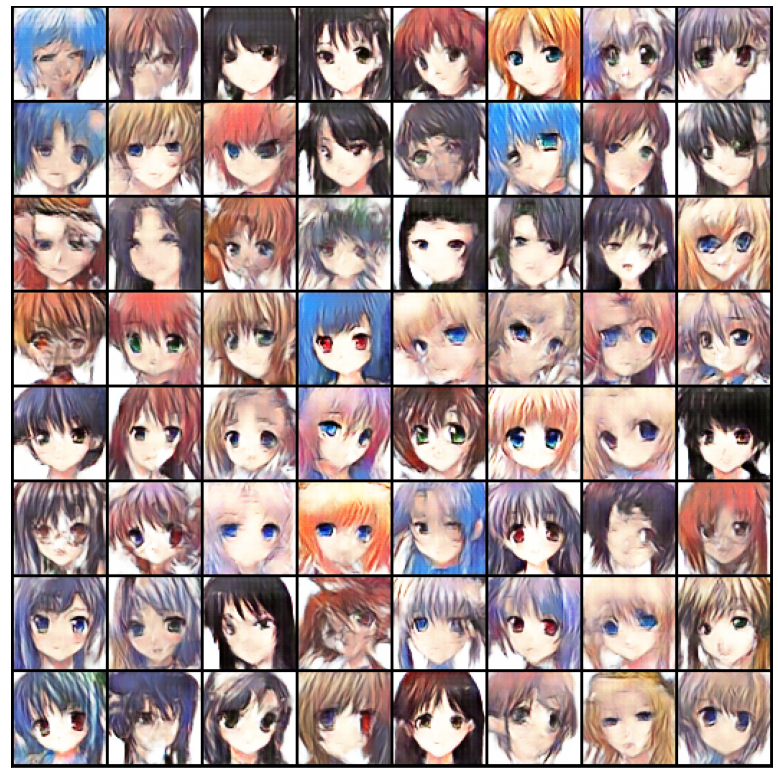

In [38]:
batch_size = 64
xb = torch.randn(batch_size, latent_size, 1, 1).to(device) # random latent tensors
fake_images = generator(xb).cpu()
print(fake_images.shape)
show_images(fake_images)

In [10]:
os.getcwd()

'/home/anhnguyen/Documents/GAN'

In [78]:
batch_size = 1
sample_tensor = torch.randn(batch_size, latent_size, 1, 1).to(device)

torch.Size([1, 3, 64, 64])


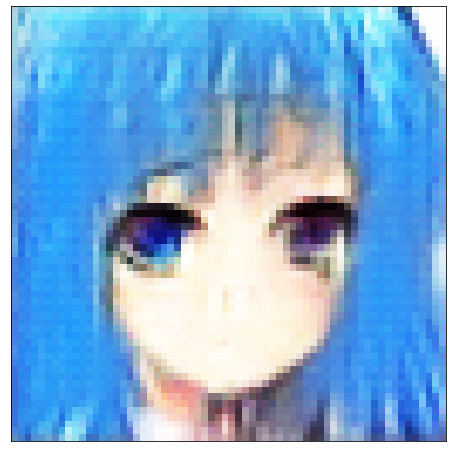

In [79]:
fake_images = generator(sample_tensor).cpu()
print(fake_images.shape)
show_images(fake_images, batch_size, (8,8))

# Test entanglement

torch.Size([1, 3, 64, 64])


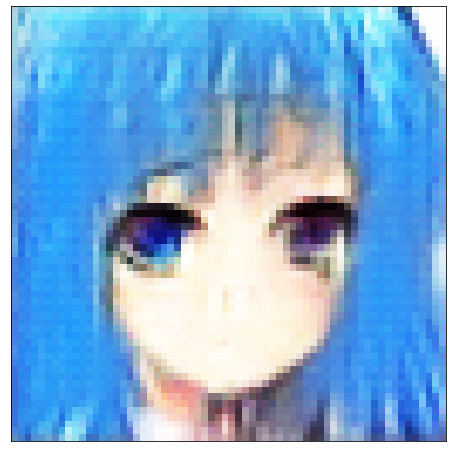

In [137]:
# Save sample
# torch.save(sample_tensor, 'sample/sample_DCGAN.pt')
# fake_PIL = transforms.functional.to_pil_image(fake_images)
# fake_PIL.save("sample/sample_DCGAN.png","PNG")

# Load sample
sample = torch.load('sample/sample_DCGAN.pt')
fake_image = generator(sample).cpu()
print(fake_image.shape)
show_images(fake_image, batch_size, (8,8))

In [138]:
def interpolate(sample_tensor, index = 0, diff = 0.5):
    #Squeeze
    copy_tensor = sample_tensor.clone()
    shape_to_squeeze = [-1,-1, 0]
    for shape in shape_to_squeeze:
        copy_tensor = torch.squeeze(copy_tensor, shape)
    
    copy_tensor[index] = copy_tensor[index] + diff
    #Unsqueeze
    for shape in shape_to_squeeze[::-1]:
        copy_tensor = torch.unsqueeze(copy_tensor, shape)
    
    return copy_tensor

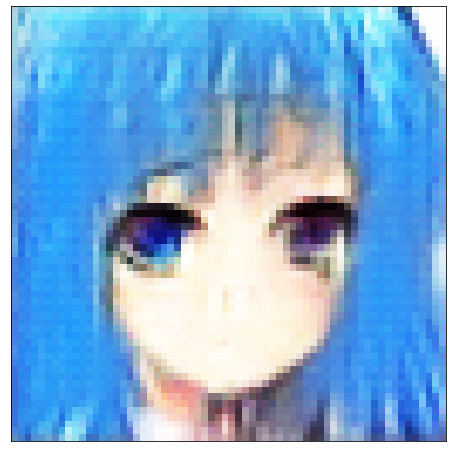

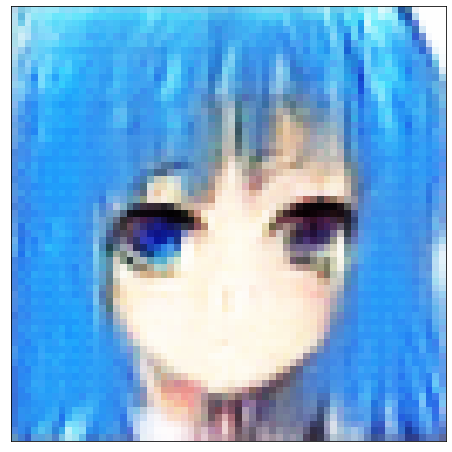

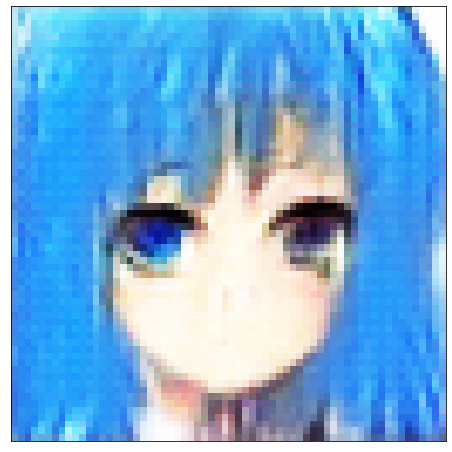

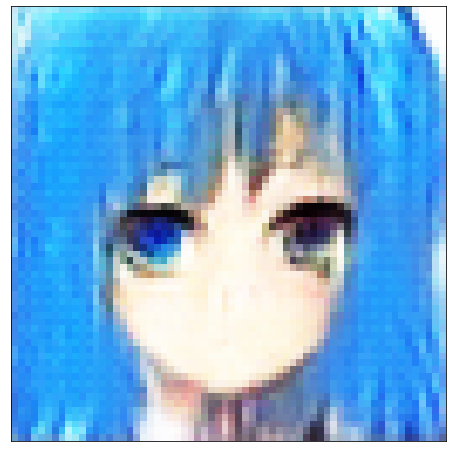

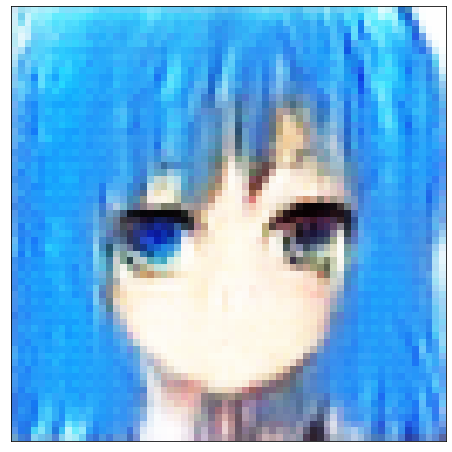

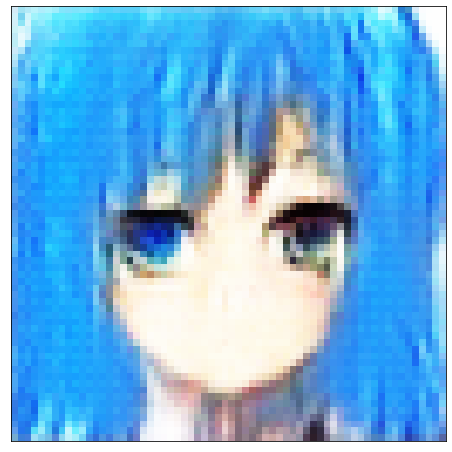

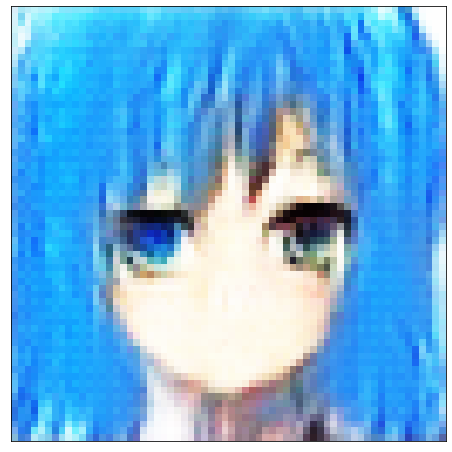

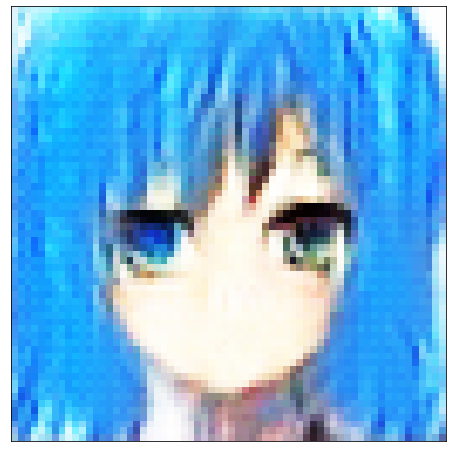

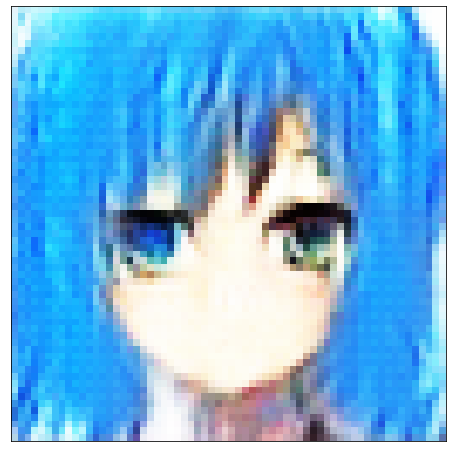

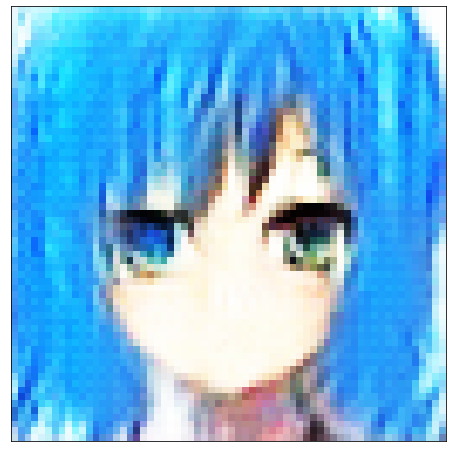

In [154]:
# Interpolate elements at 15, by 4
for i in range(10):
    interpolated_sample = interpolate(sample, index = 15, diff = i)

    fake_image = generator(interpolated_sample).cpu()
    show_images(fake_image, batch_size, (8,8))

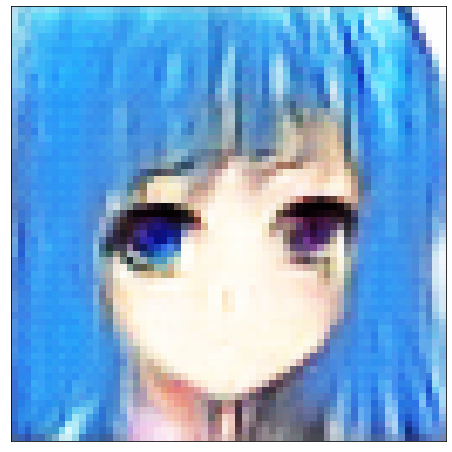

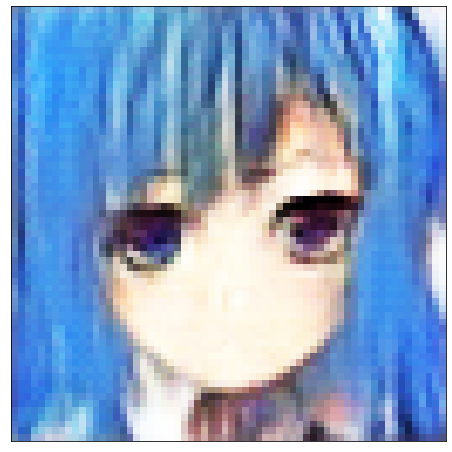

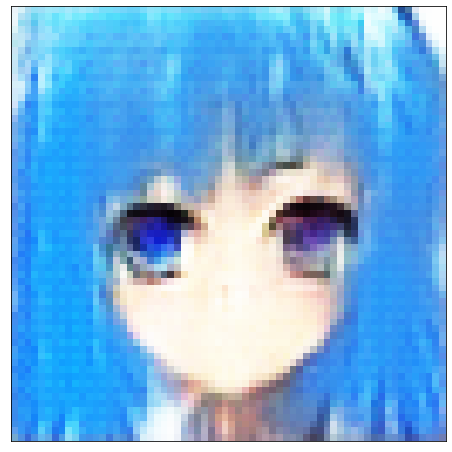

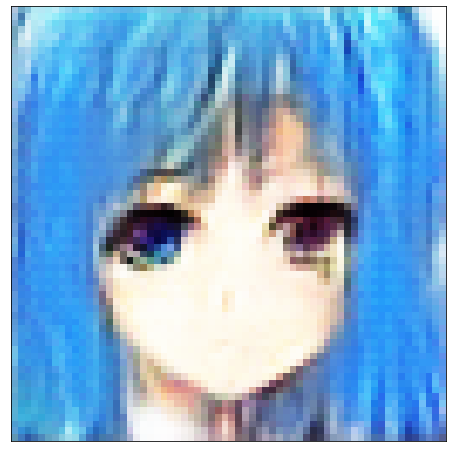

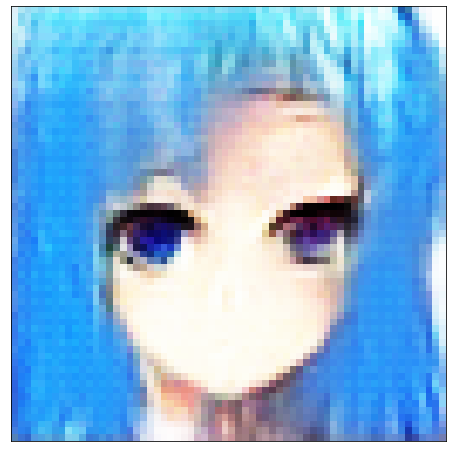

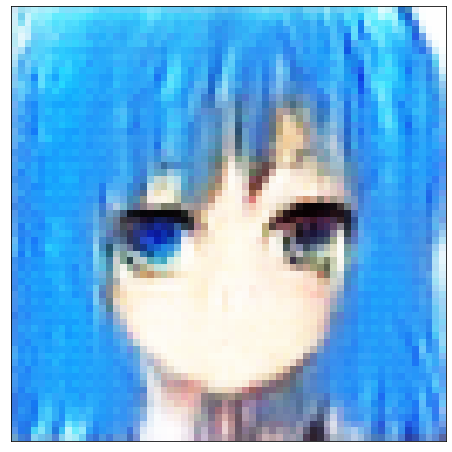

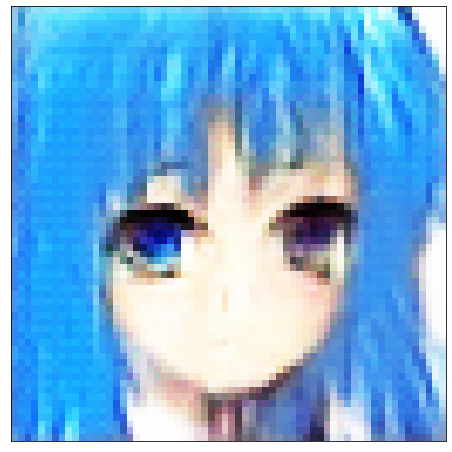

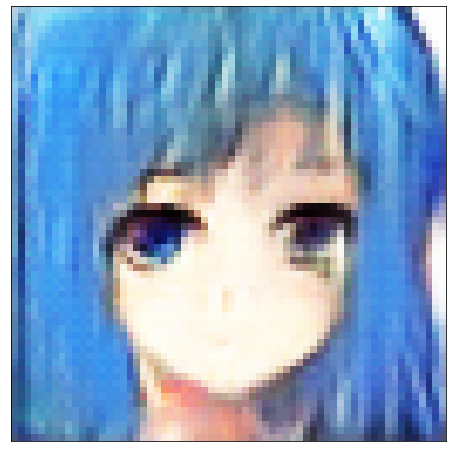

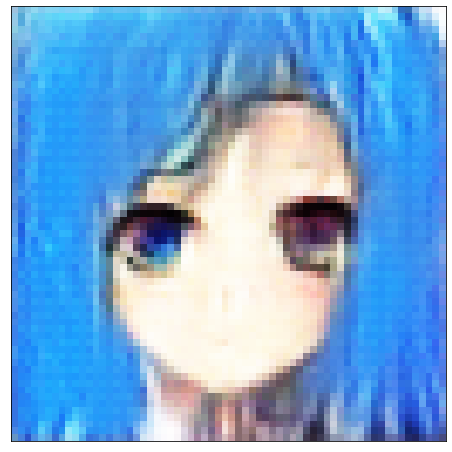

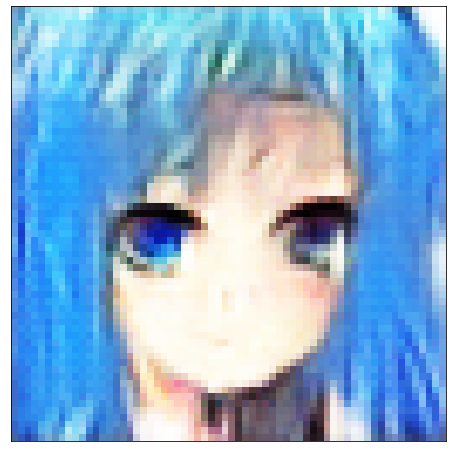

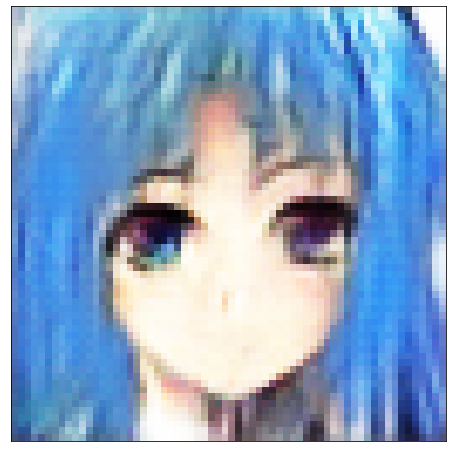

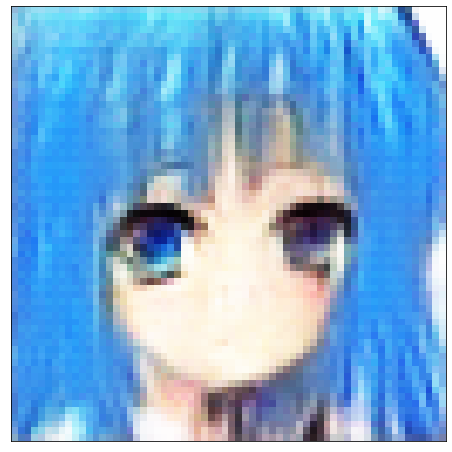

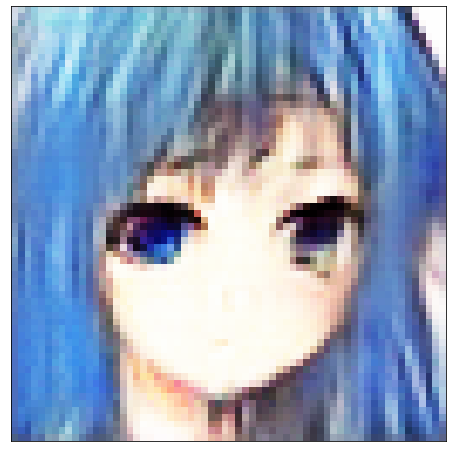

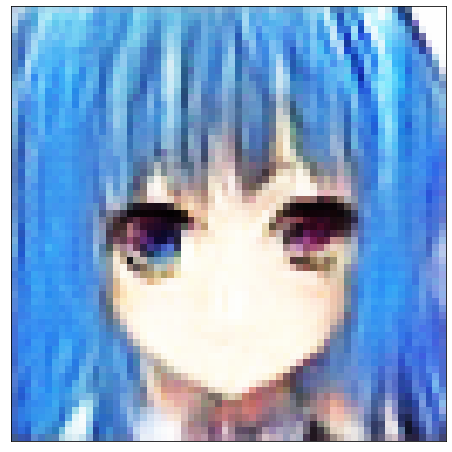

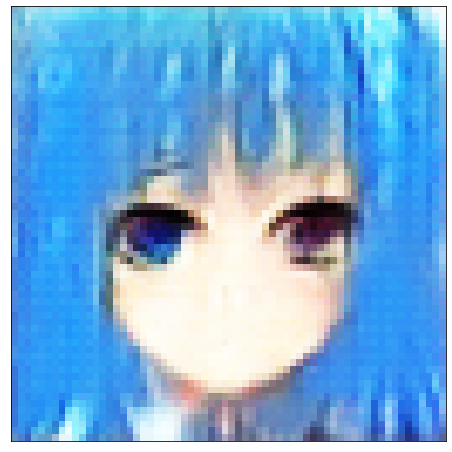

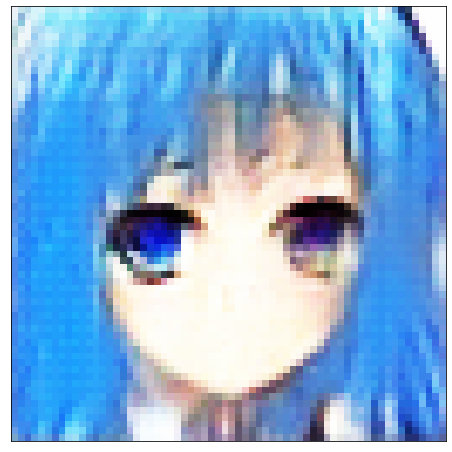

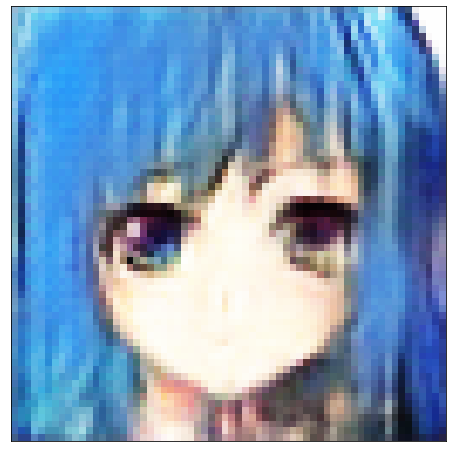

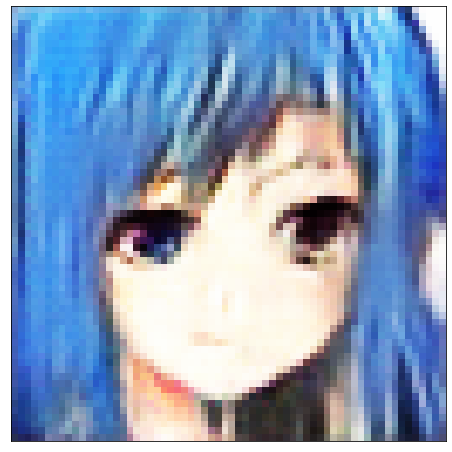

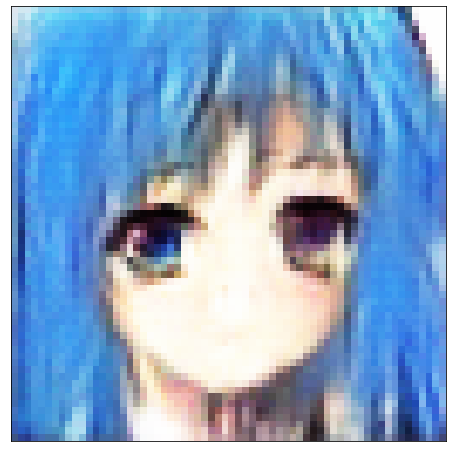

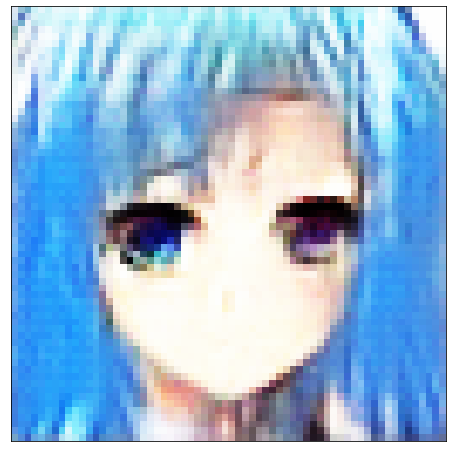

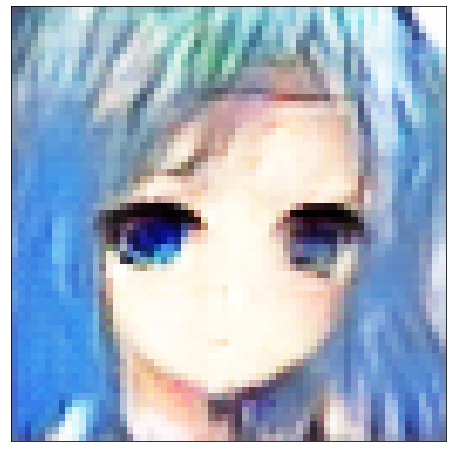

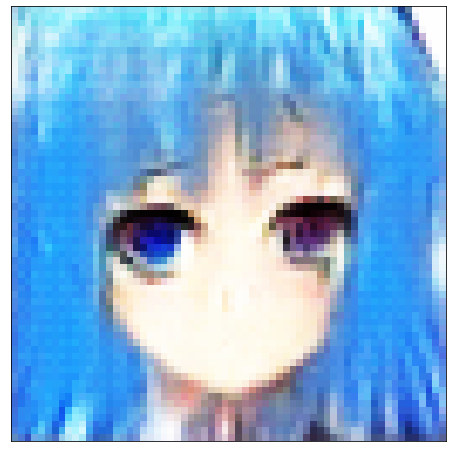

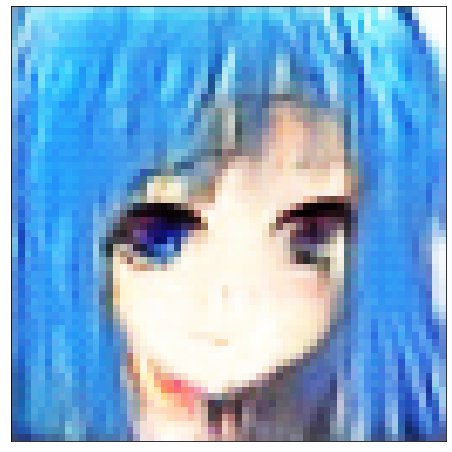

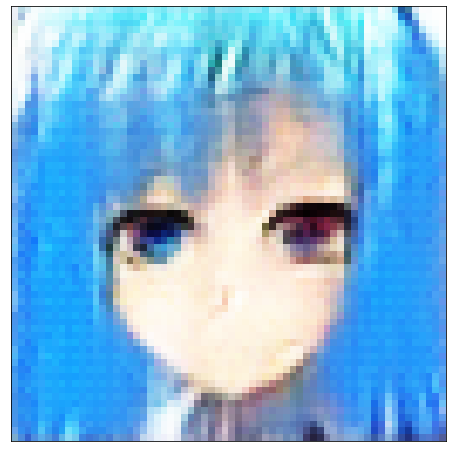

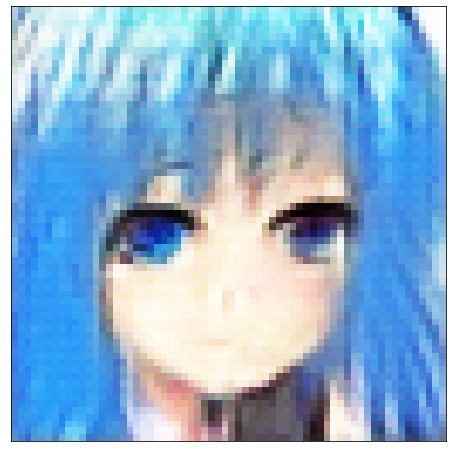

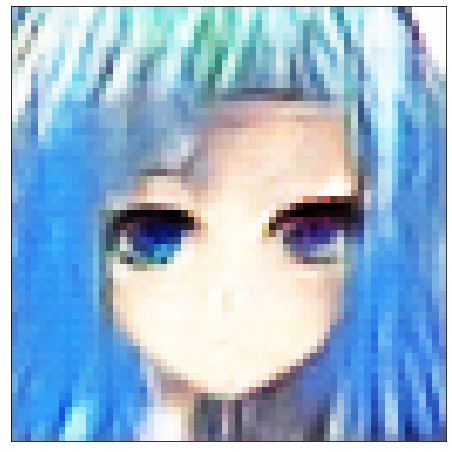

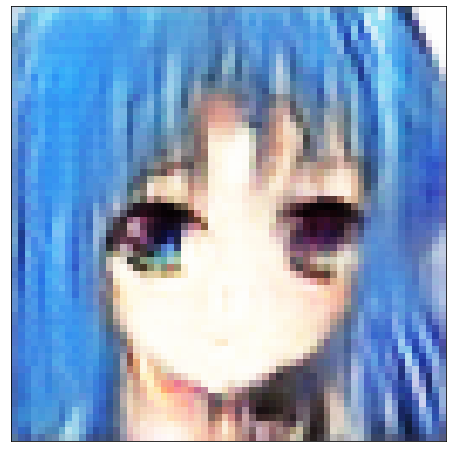

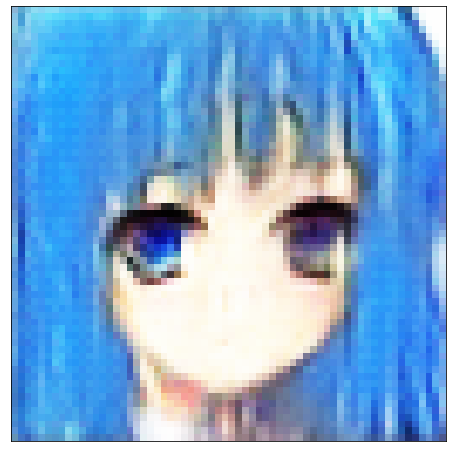

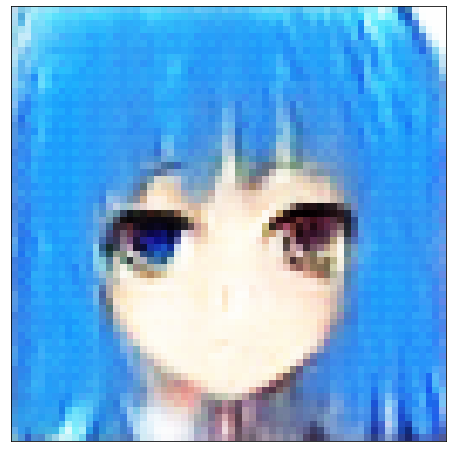

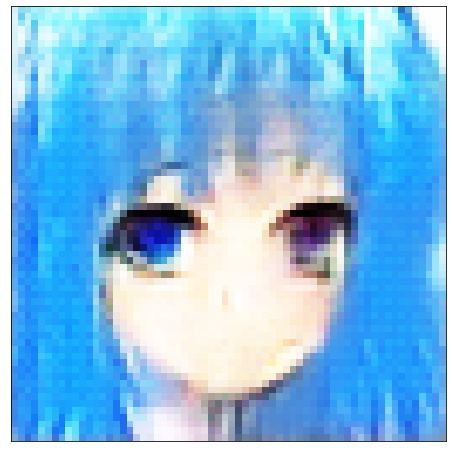

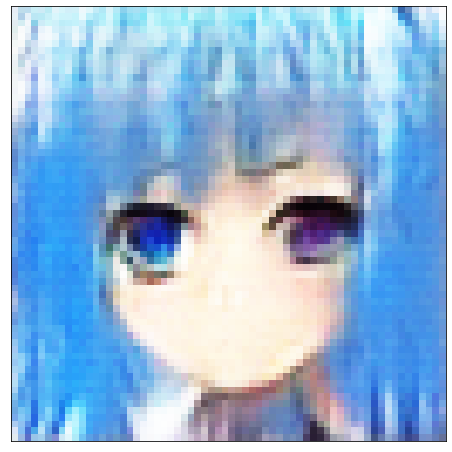

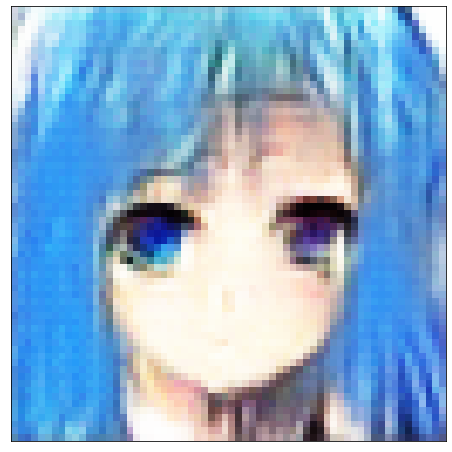

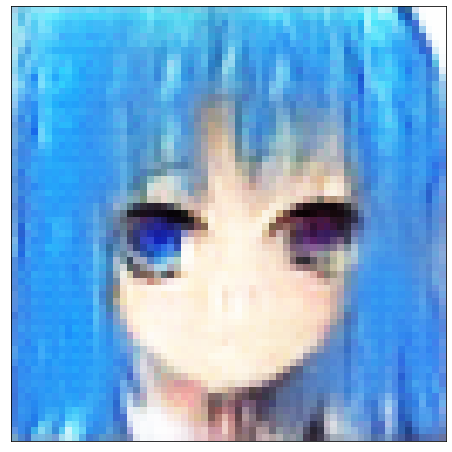

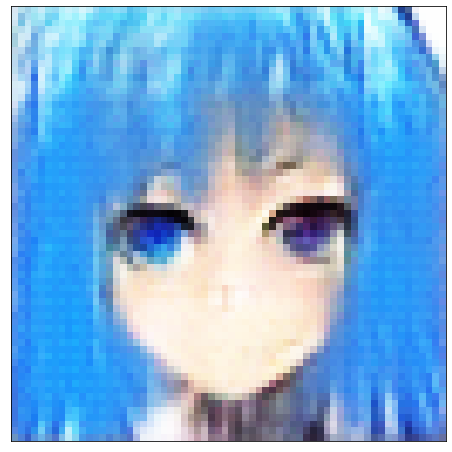

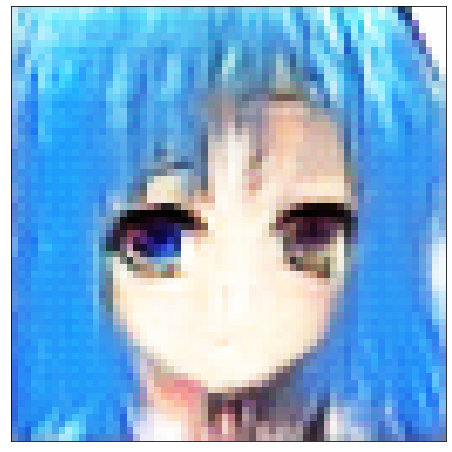

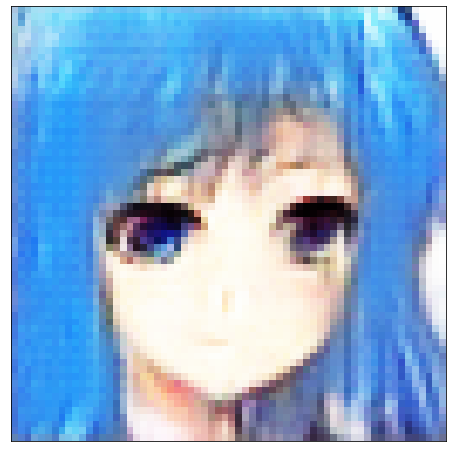

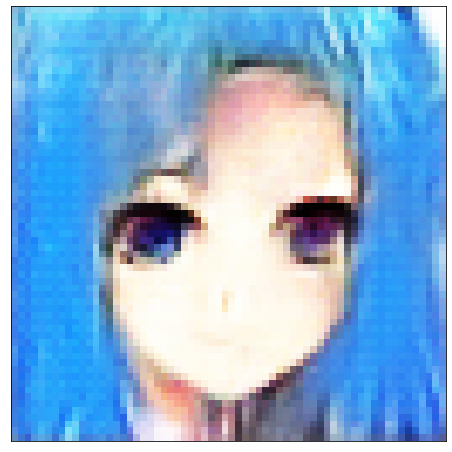

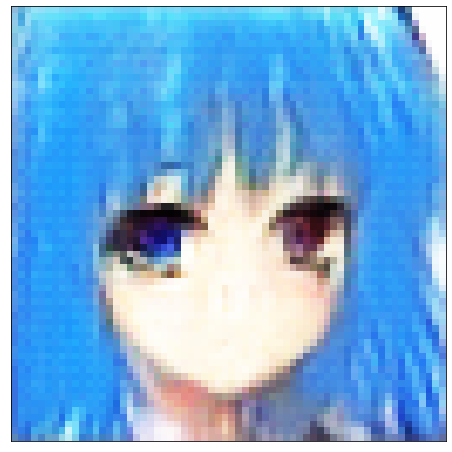

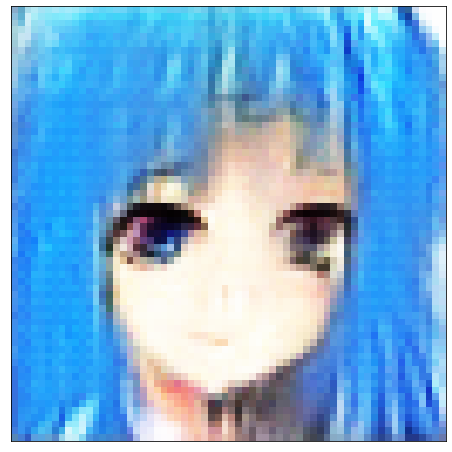

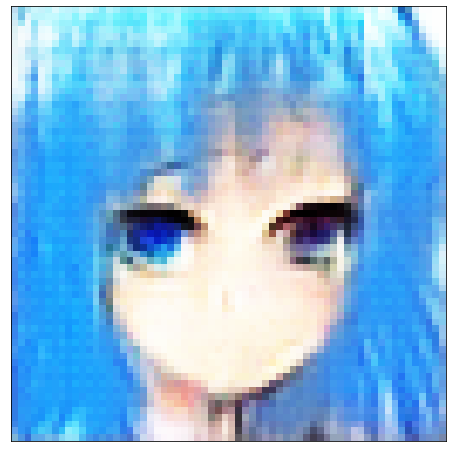

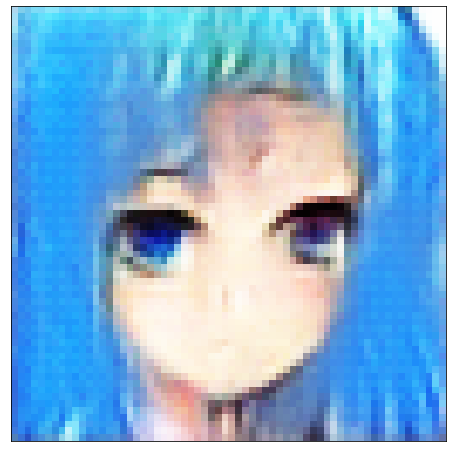

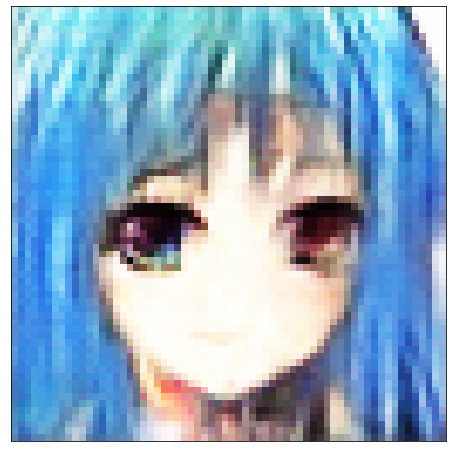

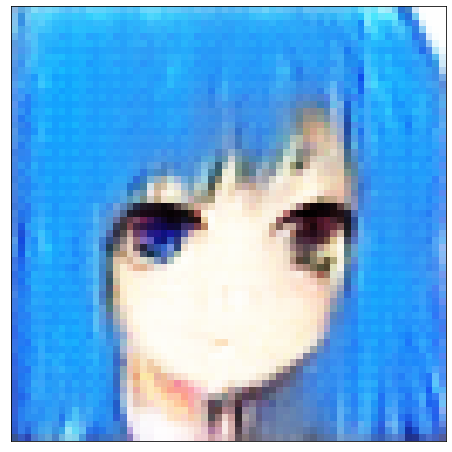

In [150]:
# Interpolate all elements by 3
for i in range(0,128,3):
    interpolated_sample = interpolate(sample, index = i, diff = 4)

    fake_image = generator(interpolated_sample).cpu()
    show_images(fake_image, batch_size, (8,8))

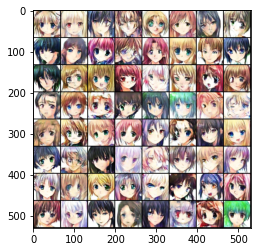

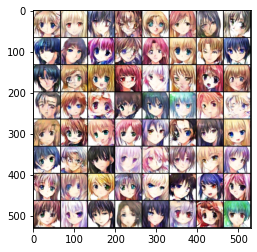

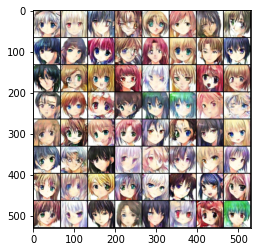

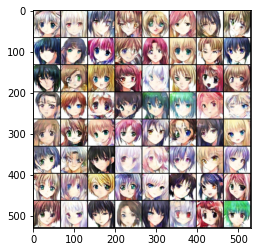

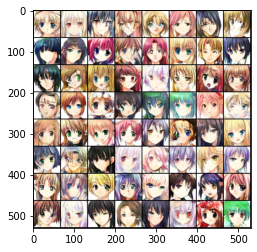

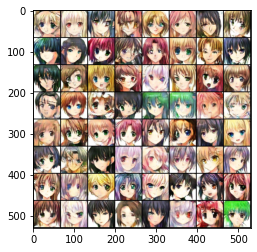

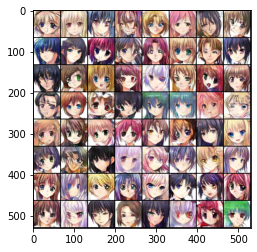

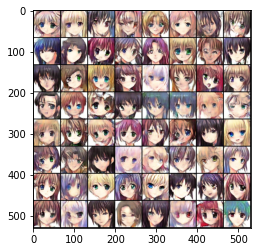

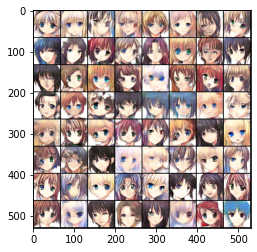

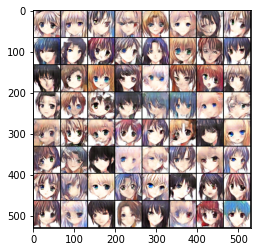

In [155]:
sample_dir = 'generated_64'
files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'generated' in f]
files.sort()
for file in files[-10:]:
    im = plt.imread(file)
    plt.imshow(im)
    plt.show()

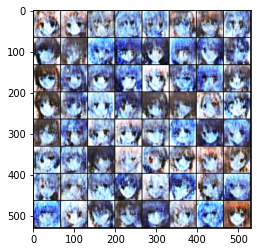

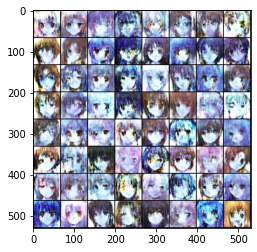

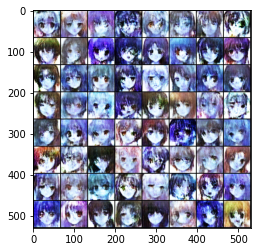

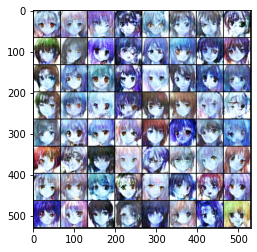

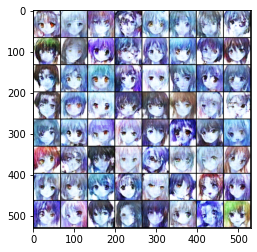

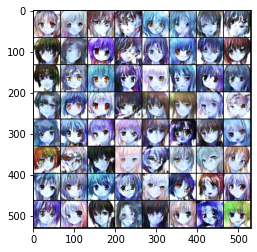

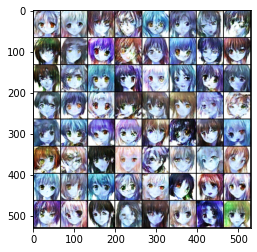

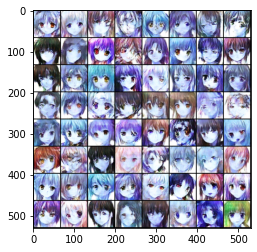

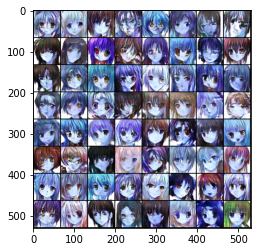

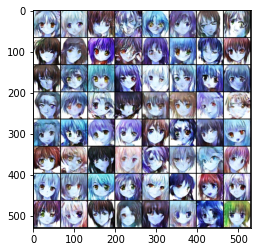

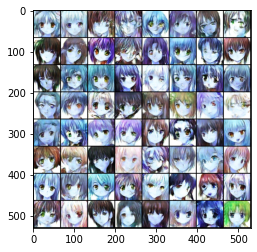

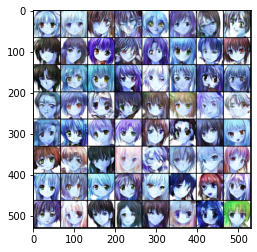

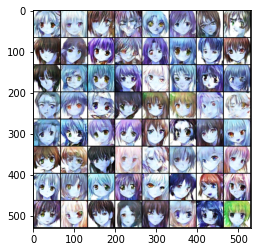

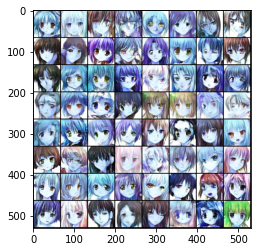

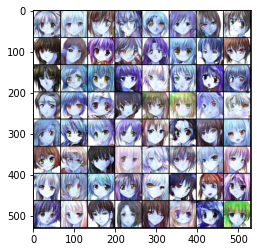

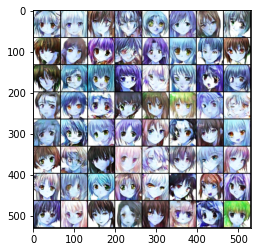

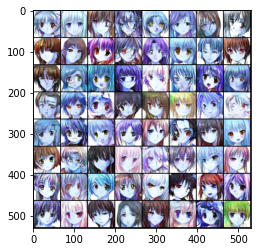

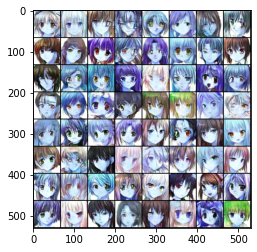

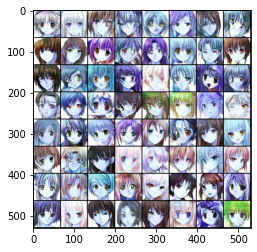

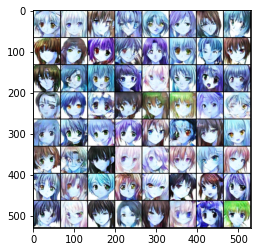

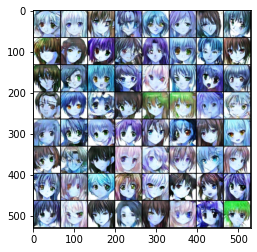

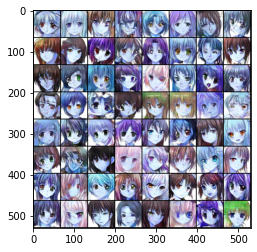

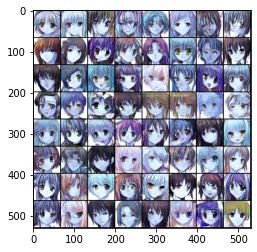

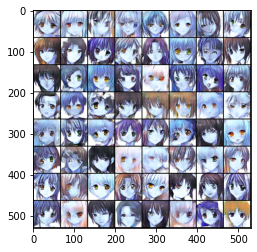

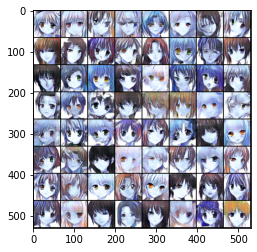

In [158]:
import cv2
import os
#Saving vids

vid_fname = f'{sample_dir}/DC-WGAN-GP_AnimeFace64_plt.avi'

img_array = []
for file in files:
    img = cv2.imread(file)
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter(vid_fname, cv2.VideoWriter_fourcc(*'MJPG'), 1, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()